In [2]:
# Žingsniai:

# 1. Duomenų užkrovimas ir paruošimas
# 2. Klasterizavimas
#     2.1. Hierarchinis klasterizavimas
#     2.2. K-vidurkių klasterizavimas
#     2.3. DBSCAN klasterizavimas
# 3. Klasifikavimas
#     3.1. Decision Trees
#     3.2. Random Forests
#     3.3. Naive Bayes
#     3.4. Regresija
#     3.5. Linijinė regresija
#     3.6. Polinominė regresija
# 4. Modelio vertinimas
#     4.1. Tikslumas, jautrumas, specifiškumas
#     4.2. ROC ir AUC analizė
# 5. Hiperparametrų optimizavimas
#     5.1. Grid Search
# 6. Modelių interpretavimas

In [3]:
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
column_names = ['class','Alcohol','Malic_acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = pd.read_csv('wine.csv', sep=',', names=column_names)
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


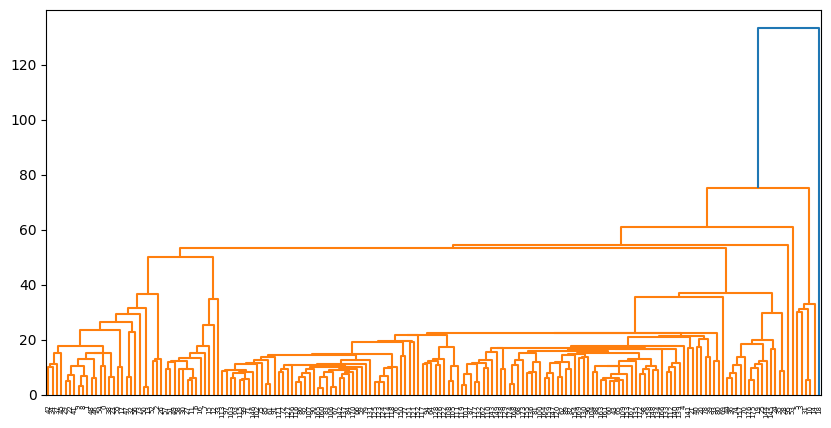

In [5]:
#     2.1. Hierarchinis klasterizavimas

X = df

# X, _ = make_blobs(n_samples=20, centers=3, n_features=2)

linked = linkage(X, 'single')

plt.figure(figsize= (10,5))
dendrogram(linked, orientation='top', labels = None, distance_sort='descending', show_leaf_counts=True)
plt.show()

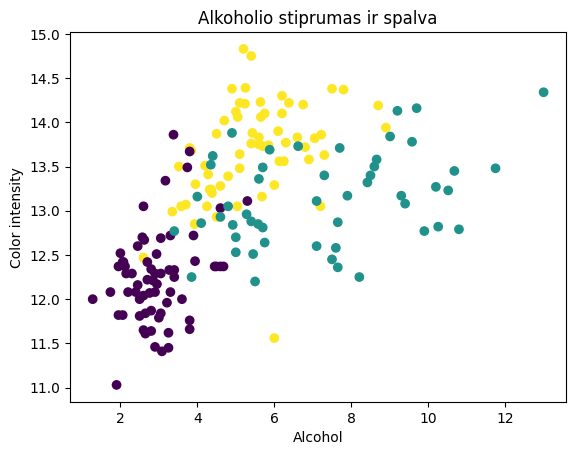

In [28]:
# 2.2. K-vidurkių klasterizavimas

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 1:]) # iloc - index location

kmeans = KMeans(n_clusters=3, random_state= 42) #random state 

clusters = kmeans.fit_predict(scaled_df)
plt.scatter(df['Color intensity'], df['Alcohol'], c=clusters, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.title('Alkoholio stiprumas ir spalva')
plt.show()

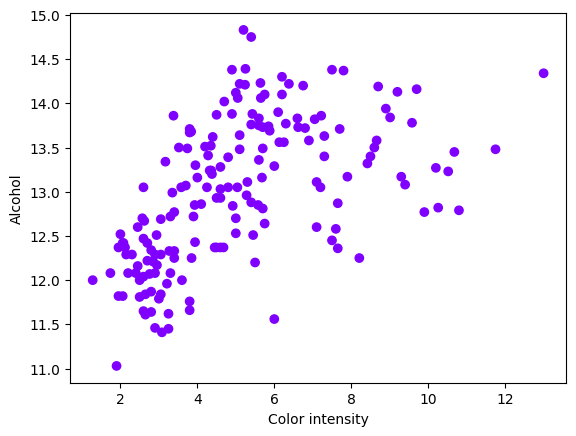

Unikalūs klasteriai: [-1]


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.1, min_samples=3)
clusters = dbscan.fit_predict(scaled_data)

plt.scatter(df['Color intensity'], df['Alcohol'], c=clusters, cmap='rainbow')
plt.xlabel('Color intensity')
plt.ylabel('Alcohol')
plt.show()

unique_clusters = np.unique(clusters)
print(f"Unikalūs klasteriai: {unique_clusters}")

In [8]:
from sklearn.tree import DecisionTreeClassifier
# 3. Klasifikavimas
#     3.1. Decision Trees


X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train,Y_train)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)

0.9444444444444444


In [32]:
# 3.2. Random Forests

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train,Y_train)

model = RandomForestClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)

1.0


In [10]:
# 3.3. Naive Bayes
from sklearn.naive_bayes import GaussianNB

X = df.drop(['class'], axis=1)
y = df['class']


kmeans = KMeans(n_clusters=2, random_state=10)
clusters = kmeans.fit_predict(X)


X_train, X_test, clusters_train, clusters_test, y_train, y_test = train_test_split(X, clusters, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, clusters_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

clusters_accuracy = accuracy_score(clusters, y)
print(clusters_accuracy)

0.3888888888888889
0.2808988764044944


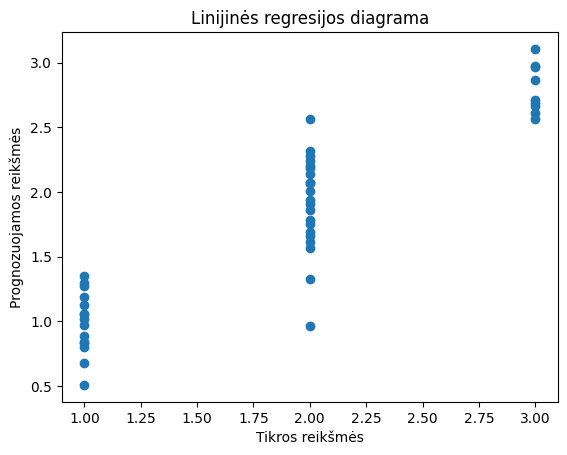

In [27]:
# 3.4. Regresija
# 3.5. Linijinė regresija
# 3.6. Polinominė regresija

from sklearn.linear_model import LinearRegression
X = df.drop(['class'], axis=1)
y = df['class']
# print(len(X))
# print(len(y))


X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


plt.scatter(y_test,y_pred )
plt.xlabel('Tikros reikšmės')
plt.ylabel('Prognozuojamos reikšmės')
plt.title('Linijinės regresijos diagrama')
plt.show()

In [12]:
# 3.6. Polinominė regresija

In [13]:
# 4. Modelio vertinimas
#     4.1. Tikslumas, jautrumas, specifiškumas
#     4.2. ROC ir AUC analizė

from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(params):
    model = RandomForestClassifier(**params)
    return -cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

models_params = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 10, 200, 1)), 
    'max_depth': hp.choice('max_depth', [None, 10, 20]), 
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)) 
}

trials = Trials()
best = fmin(fn=objective, space=models_params, algo=tpe.suggest, max_evals=100, trials=trials )
print(f"Geriausi parametrai: {best}")

100%|██████████| 100/100 [00:44<00:00,  2.26trial/s, best loss: -0.9833333333333332]
Geriausi parametrai: {'max_depth': 1, 'min_samples_split': 4.0, 'n_estimators': 110.0}


In [18]:
from sklearn.model_selection import GridSearchCV

X = df.drop(['class'], axis=1)
y = df['class']


model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200], # medziu kiekis
    'max_depth': [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split': [2, 5, 10] # minimalus pavyzdžių kiekis
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X,y)


print(f'Geriausi parametrai: {grid_search.best_params_}')
print(f'Geriausias tikslumas: {grid_search.best_score_}')



Geriausi parametrai: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Geriausias tikslumas: 0.9833333333333332
